In [1]:
import pandas as pd
import seaborn as sns

import bandit.environment as env
from bandit.neural_bandit import (
    EpsilonGreedyNeuralBandit,
    EpsilonGreedyNeuralPerArmBandit,
    SoftmaxNeuralBandit,
    SoftmaxNeuralPerArmBandit,
)

sns.set_theme()

In [2]:
import importlib

import bandit

importlib.reload(bandit.neural_bandit)

<module 'bandit.neural_bandit' from '/Users/alextanhongpin/Documents/python/python-bandit/bandit/neural_bandit.py'>

In [3]:
class ContextualEpsilonGreedyNeuralBandit(EpsilonGreedyNeuralBandit):
    def __init__(self, actions, epsilon=1.0, *args, **kwargs):
        super().__init__(epsilon, random_state=42, *args, **kwargs)
        self.actions = actions

    def preprocess(self, state: dict[str, str], action):
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualEpsilonGreedyNeuralPerArmBandit(EpsilonGreedyNeuralPerArmBandit):
    def __init__(self, actions, epsilon=1.0, *args, **kwargs):
        super().__init__(len(actions), epsilon, random_state=42, *args, **kwargs)
        self.actions = actions

    def fit(self, state: dict[str, str], action: str, reward: float):
        super().fit(state, env.actions.index(action), reward)

    def preprocess(self, state: dict[str, str]):
        action = ""
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualSoftmaxNeuralBandit(SoftmaxNeuralBandit):
    def __init__(self, actions, temperature=1.0, *args, **kwargs):
        super().__init__(temperature, random_state=42, *args, **kwargs)
        self.actions = actions

    def preprocess(self, state, action):
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualSoftmaxNeuralPerArmBandit(SoftmaxNeuralPerArmBandit):
    def __init__(self, actions, temperature=1.0, *args, **kwargs):
        super().__init__(len(actions), temperature, random_state=42, *args, **kwargs)
        self.actions = actions

    def fit(self, state: dict[str, str], action: str, reward: float):
        super().fit(state, env.actions.index(action), reward)

    def preprocess(self, state: dict[str, str]):
        action = ""
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)

In [4]:
N = 5_000
df = pd.DataFrame(index=range(N))

In [5]:
model = ContextualEpsilonGreedyNeuralBandit(env.actions, epsilon=1.0)
total_rewards = 0
avg_rewards = []

for i, ctx in env.random_context(N, random_state=42):
    action = model.predict(ctx)
    reward = env.get_cost(ctx, action)
    model.fit(ctx, action, reward)
    total_rewards += max(0, reward)
    avg_rewards.append(total_rewards / (i + 1))
df[model.__name__] = avg_rewards

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:24<00:00, 201.45it/s]


In [6]:
model = ContextualEpsilonGreedyNeuralBandit(env.actions, epsilon=0.9)
total_rewards = 0
avg_rewards = []

for i, ctx in env.random_context(N, random_state=42):
    action = model.predict(ctx)
    reward = env.get_cost(ctx, action)
    model.fit(ctx, action, reward)
    total_rewards += max(0, reward)
    avg_rewards.append(total_rewards / (i + 1))
df[model.__name__] = avg_rewards

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:12<00:00, 408.24it/s]


In [7]:
model = ContextualSoftmaxNeuralBandit(env.actions, temperature=0.2)
total_rewards = 0
avg_rewards = []

for i, ctx in env.random_context(N, random_state=42):
    action = model.predict(ctx)
    reward = env.get_cost(ctx, action)
    model.fit(ctx, action, reward)
    total_rewards += max(0, reward)
    avg_rewards.append(total_rewards / (i + 1))
df[model.__name__] = avg_rewards

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:12<00:00, 390.49it/s]


In [8]:
model = ContextualSoftmaxNeuralBandit(env.actions, temperature=0.5)
total_rewards = 0
avg_rewards = []

for i, ctx in env.random_context(N, random_state=42):
    action = model.predict(ctx)
    reward = env.get_cost(ctx, action)
    model.fit(ctx, action, reward)
    total_rewards += max(0, reward)
    avg_rewards.append(total_rewards / (i + 1))
df[model.__name__] = avg_rewards

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:14<00:00, 341.94it/s]


In [9]:
model = ContextualEpsilonGreedyNeuralPerArmBandit(env.actions, epsilon=1.0)
total_rewards = 0
avg_rewards = []

for i, ctx in env.random_context(N, random_state=42):
    action = model.predict(ctx)
    reward = env.get_cost(ctx, action)
    model.fit(ctx, action, reward)
    total_rewards += max(0, reward)
    avg_rewards.append(total_rewards / (i + 1))
df[model.__name__] = avg_rewards

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:20<00:00, 242.53it/s]


In [10]:
model = ContextualEpsilonGreedyNeuralPerArmBandit(env.actions, epsilon=0.9)
total_rewards = 0
avg_rewards = []

for i, ctx in env.random_context(N, random_state=42):
    action = model.predict(ctx)
    reward = env.get_cost(ctx, action)
    model.fit(ctx, action, reward)
    total_rewards += max(0, reward)
    avg_rewards.append(total_rewards / (i + 1))
df[model.__name__] = avg_rewards

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:21<00:00, 234.12it/s]


In [11]:
model = ContextualSoftmaxNeuralPerArmBandit(env.actions, temperature=0.2)
total_rewards = 0
avg_rewards = []

for i, ctx in env.random_context(N, random_state=42):
    action = model.predict(ctx)
    reward = env.get_cost(ctx, action)
    model.fit(ctx, action, reward)
    total_rewards += max(0, reward)
    avg_rewards.append(total_rewards / (i + 1))
df[model.__name__] = avg_rewards

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:21<00:00, 233.96it/s]


In [12]:
model = ContextualSoftmaxNeuralPerArmBandit(env.actions, temperature=0.5)
total_rewards = 0
avg_rewards = []

for i, ctx in env.random_context(N, random_state=42):
    action = model.predict(ctx)
    reward = env.get_cost(ctx, action)
    model.fit(ctx, action, reward)
    total_rewards += max(0, reward)
    avg_rewards.append(total_rewards / (i + 1))
df[model.__name__] = avg_rewards

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:20<00:00, 246.22it/s]


In [13]:
import numpy as np

style = ["-", "--"]


def plot(*patterns):
    cols = []
    for col in df.columns:
        for pat in patterns:
            if pat not in col:
                break
        else:
            cols.append(col)
    repeat = (len(cols) + 1) // 2
    df[cols].plot(figsize=(12, 8), style=style * repeat)

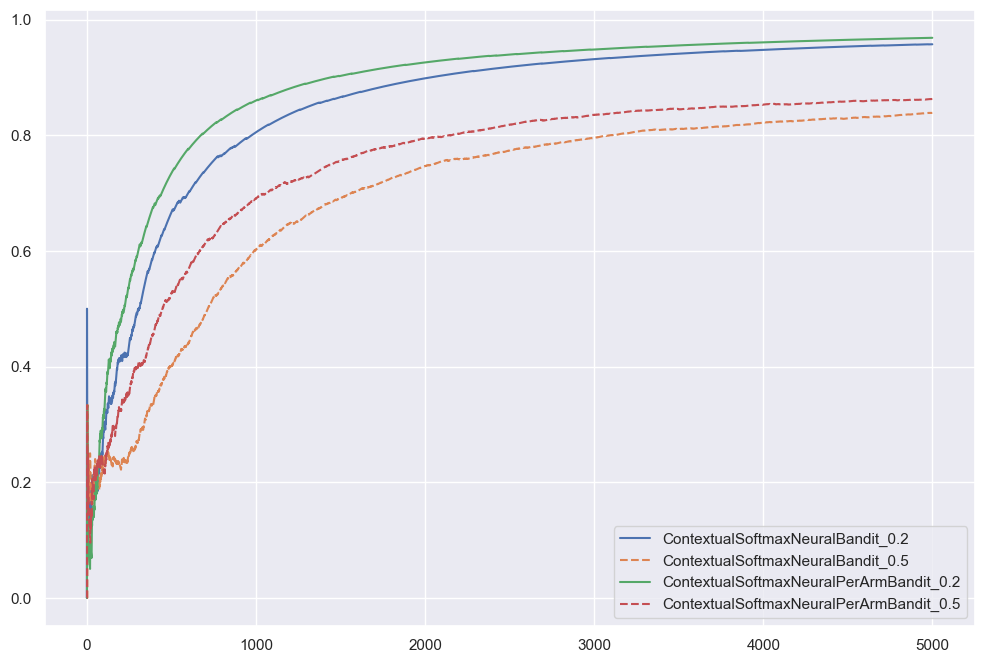

In [14]:
plot("Softmax")

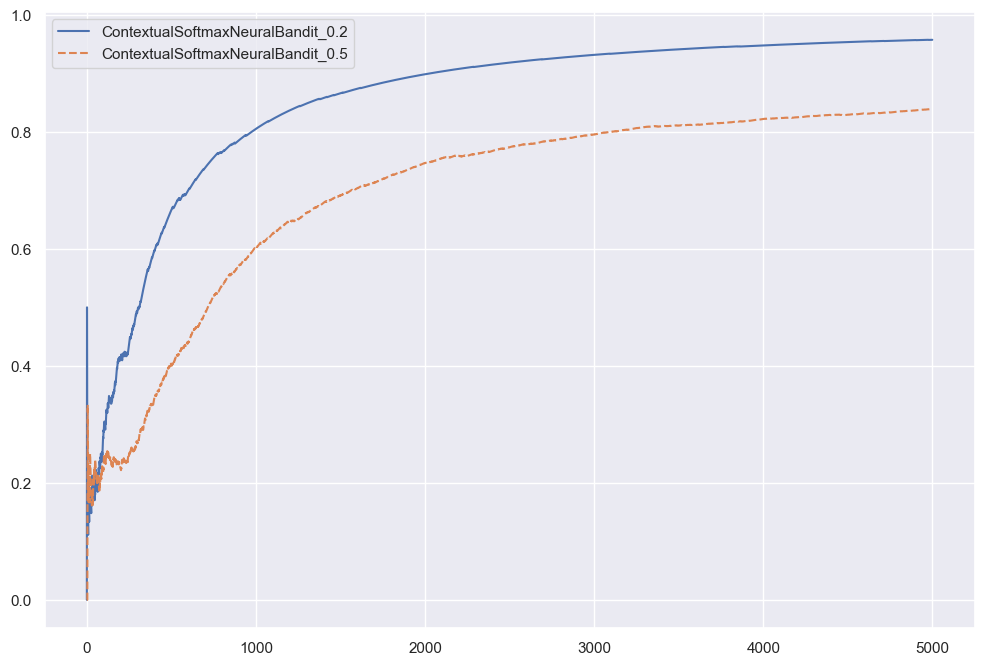

In [15]:
plot("SoftmaxNeuralBandit")

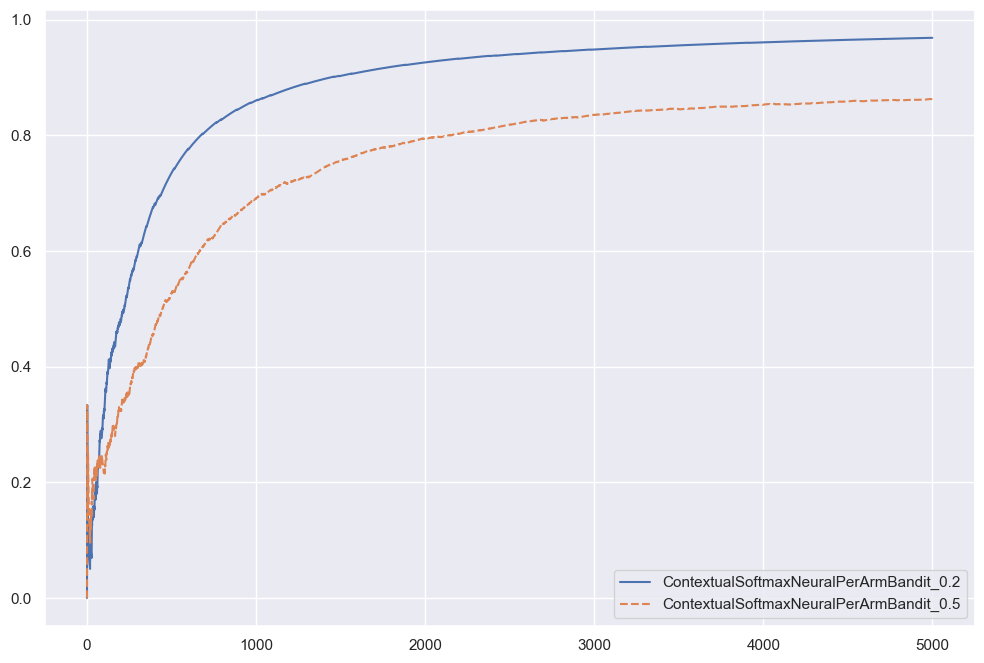

In [16]:
plot("SoftmaxNeuralPerArmBandit")

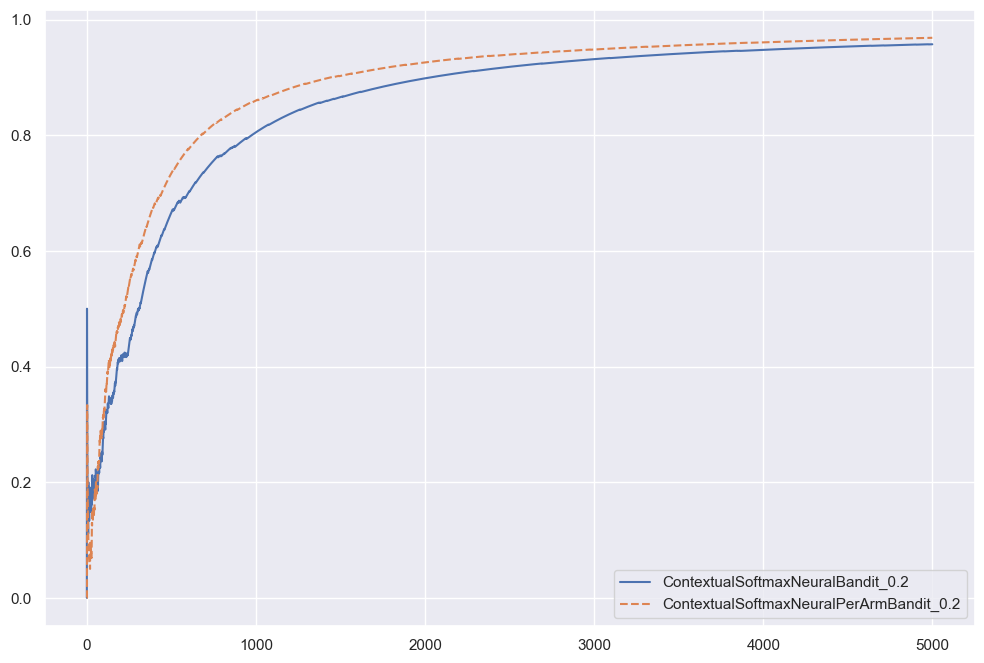

In [17]:
plot("Softmax", "0.2")

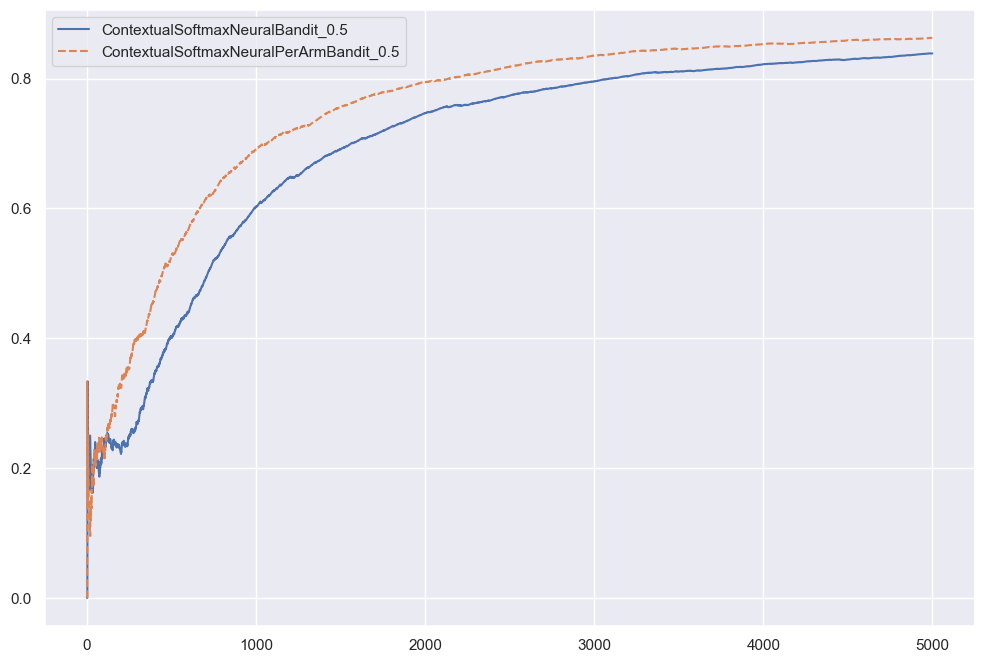

In [18]:
plot("Softmax", "0.5")

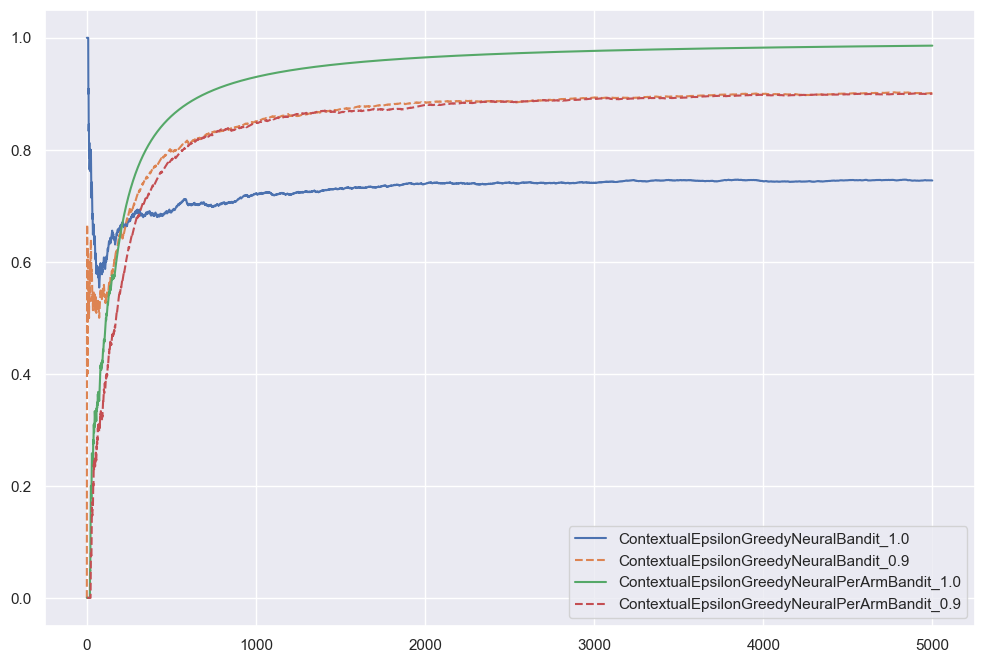

In [19]:
plot("Greedy")

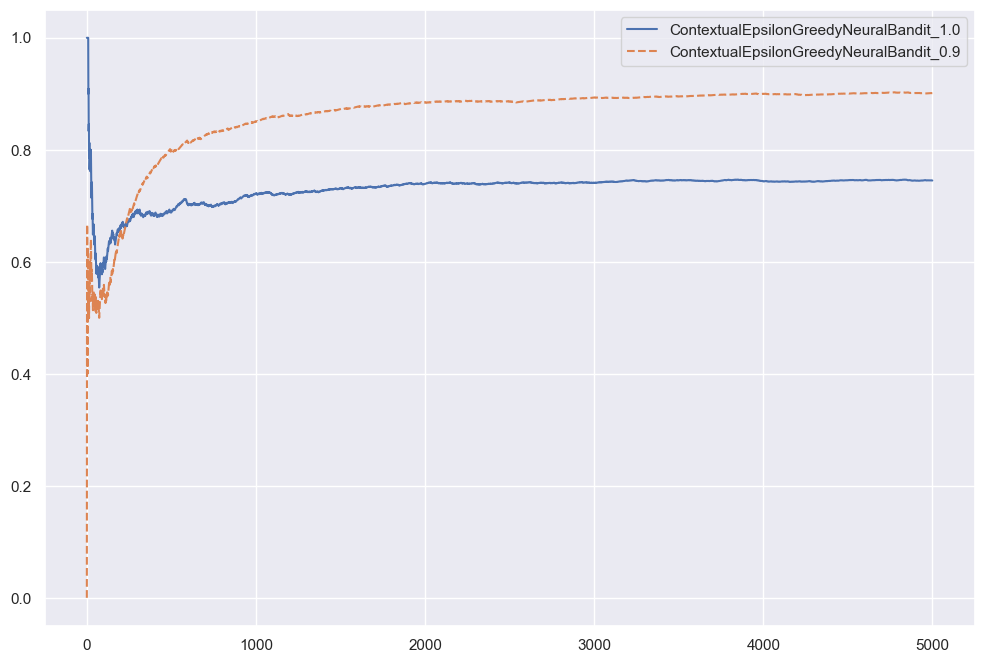

In [20]:
plot("GreedyNeuralBandit")

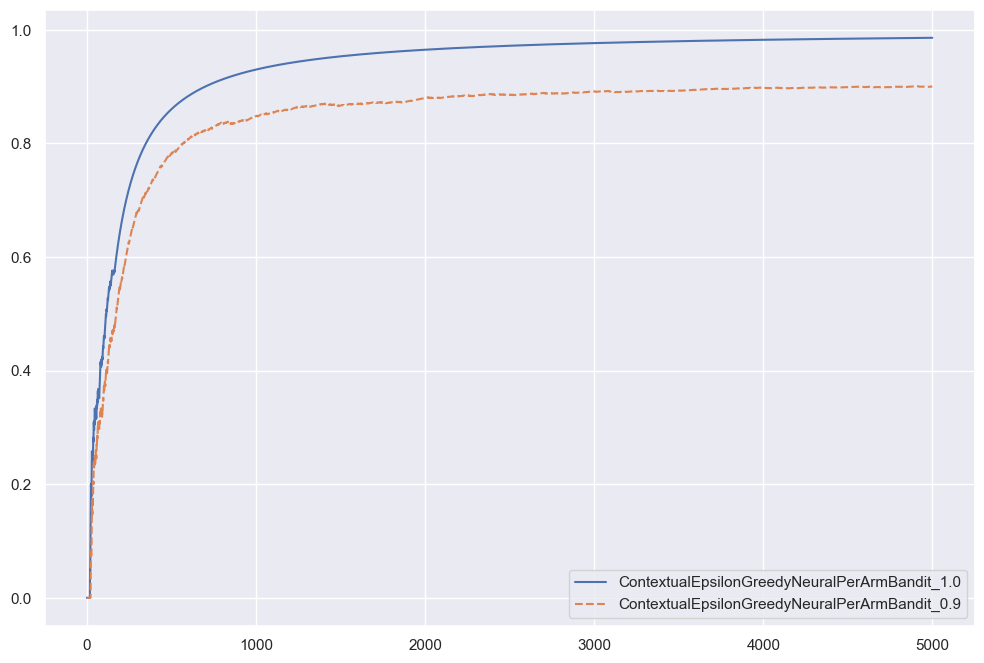

In [21]:
plot("GreedyNeuralPerArmBandit")

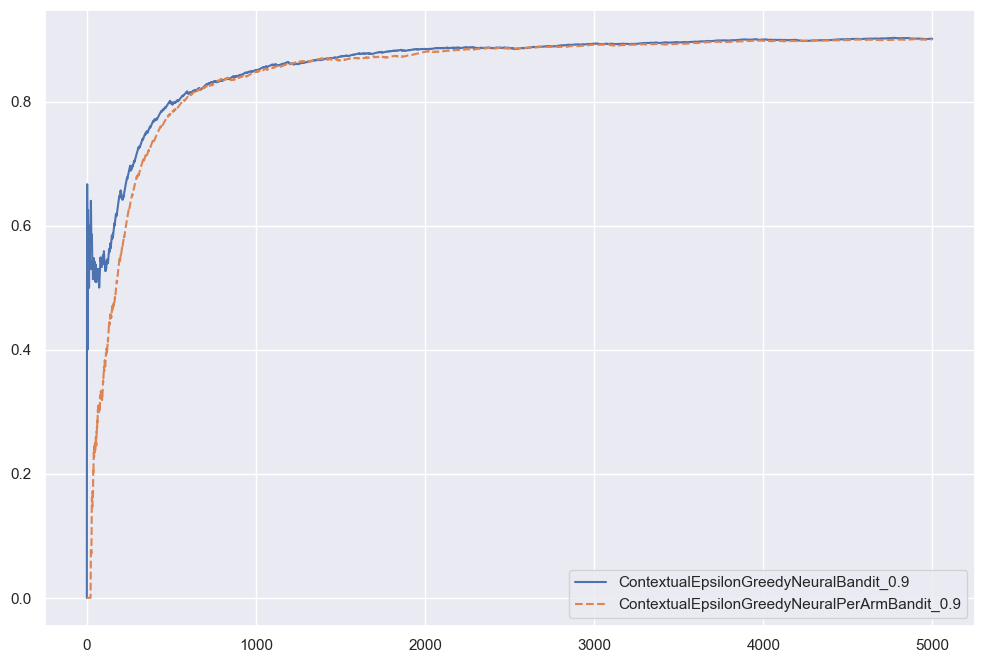

In [22]:
plot("Greedy", "0.9")

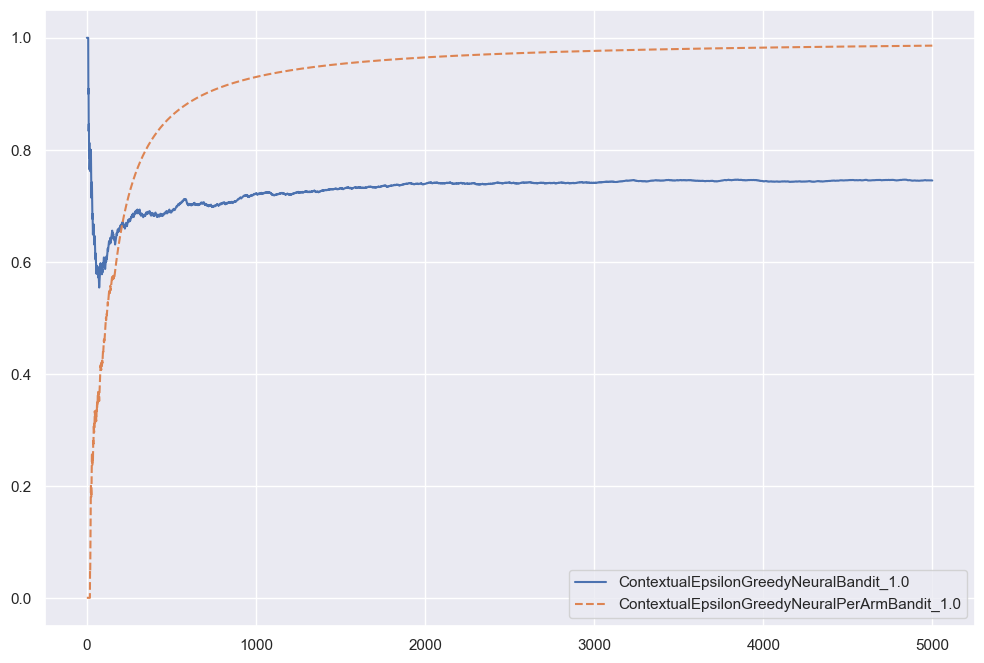

In [23]:
plot("Greedy", "1.0")

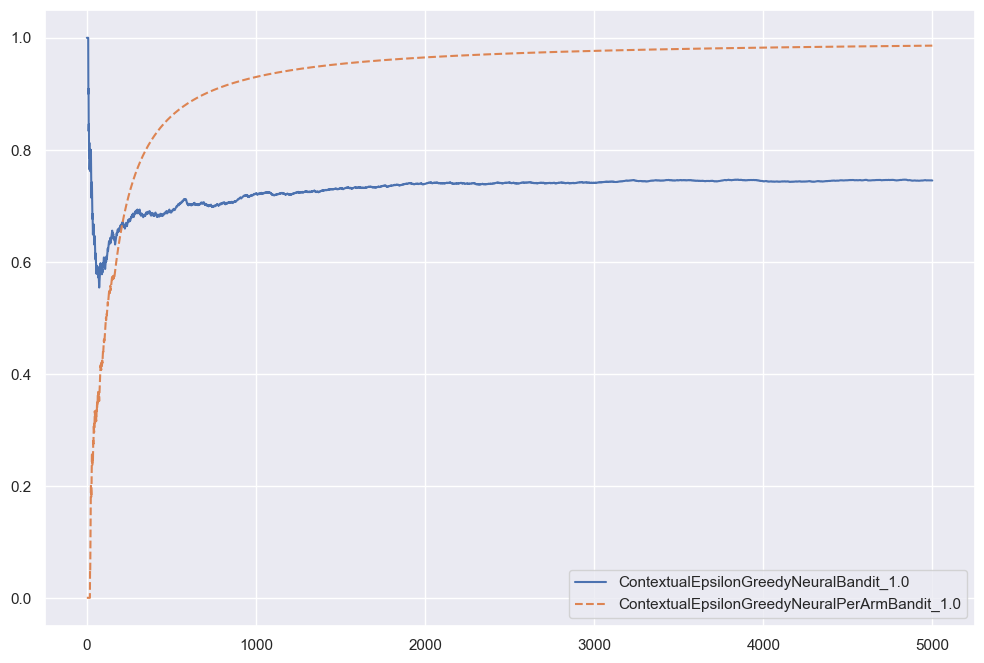

In [24]:
plot("GreedyNeural", "1.0")

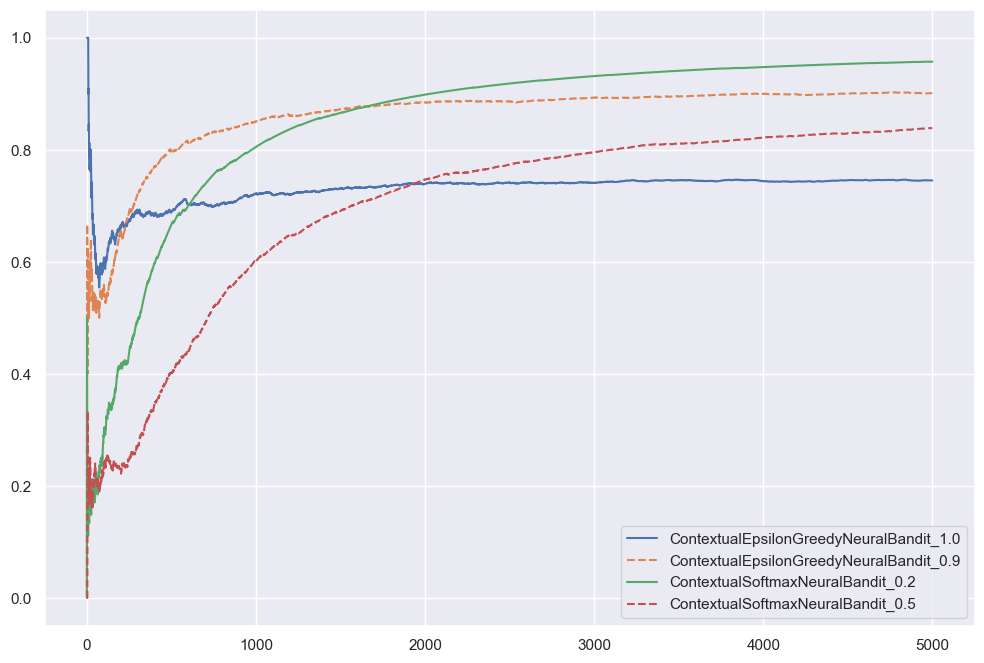

In [25]:
plot("NeuralBandit")

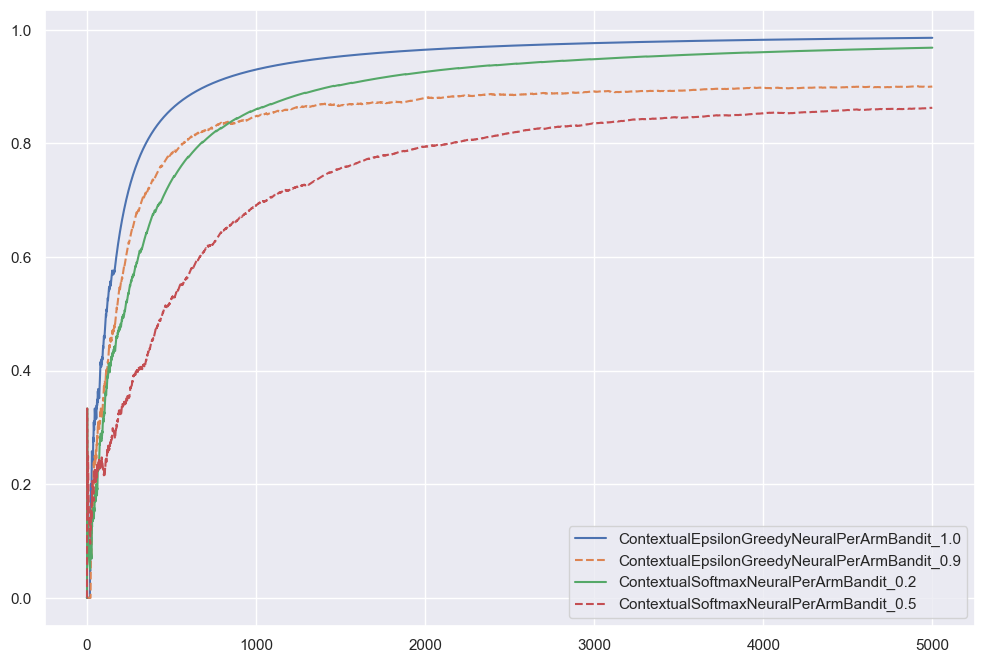

In [26]:
plot("NeuralPerArmBandit")